<a href="https://colab.research.google.com/github/poojan007/ICT606-Tutorials/blob/main/ICT606_Assignment_2-Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BERTopic on Twitter Climate Change Dataset

This notebook demonstrates the step-by-step process of performing BERTopic for topic modeling. The main tasks include data preprocessing, topic modeling, and visualization of the results.

## Upload file by mounting google drive

In [1]:
from google.colab import drive
drive.mount('/mntDrive')

Mounted at /mntDrive


In [2]:
!cp -rf /mntDrive/MyDrive/ICT606-Dataset/twitter_sentiment_data.csv -d twitter_sentiment_data.csv

Installing BERTopic package

In [3]:
%%capture
!pip install bertopic

## Data preparation

First, we need to import the necessary libraries and load the dataset into a pandas DataFrame. Then, we will inspect and clean the data, including converting text to lowercase.

In [4]:
import pandas as pd
import numpy as np
from bertopic import BERTopic

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
import nltk
import re

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Download necessary NLTK data files
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load your dataset
df = pd.read_csv('twitter_sentiment_data.csv')
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


## Exploratory Data Analysis (EDA)

General Statistics

The dataset has 43943 observations and 3 variables.

In [5]:
# General Statistics
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43943 entries, 0 to 43942
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  43943 non-null  int64 
 1   message    43943 non-null  object
 2   tweetid    43943 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB
None


Word cloud to check the word occurence

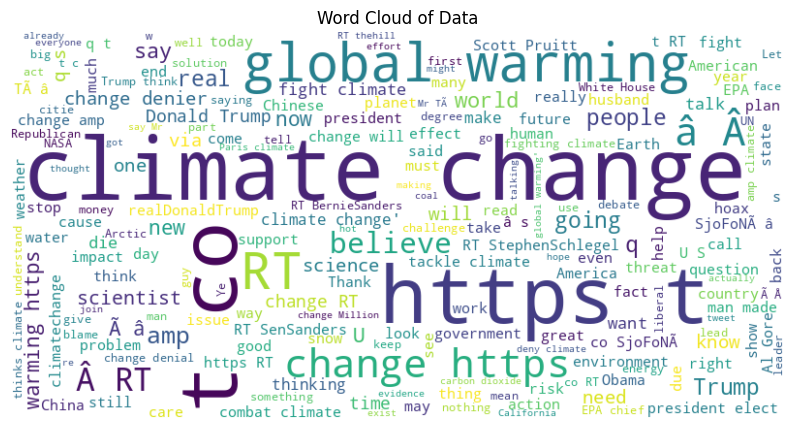

In [6]:
# Word Cloud
text = ' '.join(df['message'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Data')
plt.show()

## Data preprocessing

In this step, we preprocess the text by removing URLs, mentions, hashtags, special characters, and extra spaces. We also perform tokenization, and apply lemmatization.

In [7]:
# Identify inconsistencies
# It returns the total duplicate rows in the dataset
total_duplicates = df.duplicated().sum()
print("Total duplicate rows:", total_duplicates)

Total duplicate rows: 0


In [8]:
# Identify missing values
# The code is calculating the number of missing values in each column of the DataFrame `df`.
# It uses the `isna()` method to check for missing values and the `sum()` method to calculate the total number
# of missing values in each column. The result is stored in the variable `missing_values`.
missing_values = df.isna().sum()
missing_values

sentiment    0
message      0
tweetid      0
dtype: int64

In [9]:
# Define stop words
#stop_words = set(stopwords.words('english'))

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Combined preprocessing function
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove special characters
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize text
    tokens = word_tokenize(text)
    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Remove stop words
    #filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply the preprocessing function to the DataFrame
df['cleaned_text'] = df['message'].apply(preprocess_text)

df.head()

,sentiment,message,tweetid,cleaned_text
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840,climate change is an interesting hustle a it w...
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641,RT Watch right here a travel the world to tack...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256,Fabulous Leonardo s film on change is brillian...
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904,RT Just watched this amazing documentary by le...
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153,RT Pranita Biswasi a Lutheran from Odisha give...


## Model Training

In [ ]:
topic_model = BERTopic(language = "english", calculate_probabilities = True)
topics, probabilities = topic_model.fit_transform(df['cleaned_text'])

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
# check the topic length
len(set(topics))

In [ ]:
# # check the most frequent topics
freq = topic_model.get_topic_info(); freq.head(5)

In [ ]:
# Check the topic frequencies for all the topics
topic_model.get_topic_freq()

## Visualisations

In [ ]:
# Visualize topics
topic_model.visualize_topics()

In [ ]:
# Visualise the topic hierarchies
topic_model.visualize_hierarchy(top_n_topics=50)

The variable `probabilities` that is returned from `transform()` or `fit_transform()` can
be used to understand how confident BERTopic is that certain topics can be found in a document.

To visualize the distributions, we simply call:

In [ ]:
topic_model.visualize_distribution(probabilities[200], min_probability=0.005)

In [ ]:
# Visualise the top 5 topics
topic_model.visualize_barchart(top_n_topics=5)

In [ ]:
# Visualise the topic similarity matrix
topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

In [ ]:
# Visualise the topic decline score
topic_model.visualize_term_rank()

## Model Evaluation



In [ ]:
# import library from gensim
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

# Preprocess documents
cleaned_docs = topic_model._preprocess_text(df["cleaned_text"])

# Extract vectorizer from BERTopic
vectorizer = topic_model.vectorizer_model

# Extract features for Topic Coherence evaluation
analyzer = vectorizer.build_analyzer()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topics = topic_model.get_topics()
topics.pop(-1, None)
topic_words = [
[word for word, _ in topic_model.get_topic(topic) if word != ""] for topic in topics
]
topic_words = [[words for words, _ in topic_model.get_topic(topic)]
        for topic in range(len(set(topics))-1)][:10]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                          texts=tokens,
                          corpus=corpus,
                          dictionary=dictionary,
                          coherence='c_v')
coherence = coherence_model.get_coherence()

In [ ]:
print(coherence)

In [ ]:
coherence_per_topic = coherence_model.get_coherence_per_topic()
coherence_per_topic[:10]

## GridSearchCV

Using GridSearchCV for determining the optimal parameters for BERTopic model, we need to create a custom scorer that uses coherence score as the evaluation metric.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic import BERTopic
from gensim.models.coherencemodel import CoherenceModel
from sklearn.model_selection import GridSearchCV
import numpy as np

# Function to calculate coherence score
def calculate_coherence_score(model, documents):
    topics = model.get_topics()
    topic_words = [[word for word, _ in model.get_topic(topic)] for topic in range(len(topics))]
    coherence_model = CoherenceModel(topics=topic_words, texts=documents, dictionary=model.vectorizer_model.get_feature_names_out(), coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# Custom scorer for GridSearchCV
def coherence_scorer(estimator, X):
    topics, _ = estimator.fit_transform(X)
    score = calculate_coherence_score(estimator, X)
    return score

# Initialize the SentenceTransformer model
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Define the parameters grid for GridSearchCV
param_grid = {
    'umap_model__n_neighbors': [10, 15, 20],
    'umap_model__n_components': [5, 10, 15],
    'umap_model__min_dist': [0.0, 0.1, 0.2],
    'hdbscan_model__min_cluster_size': [20, 30, 40],
    'hdbscan_model__min_samples': [5, 10, 15]
}

# Initialize the base BERTopic model without parameters
base_topic_model = BERTopic(
    embedding_model=embedding_model,
    vectorizer_model=CountVectorizer(stop_words='english'),
    top_n_words=5,
    language='english',
    calculate_probabilities=True,
    verbose=True
)

# Initialize UMAP model and HDBSCAN model separately for parameter search
umap_model = UMAP()
hdbscan_model = HDBSCAN()

# Add the UMAP and HDBSCAN models to the base BERTopic model
base_topic_model.umap_model = umap_model
base_topic_model.hdbscan_model = hdbscan_model

# Create the GridSearchCV object
grid_search = GridSearchCV(
    base_topic_model,
    param_grid=param_grid,
    scoring=coherence_scorer,
    cv=3,
    verbose=3,
    n_jobs=-1
)

# Fit the GridSearchCV object on the preprocessed tweet content
grid_search.fit(df['cleaned_text'].to_list())

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters: ", best_params)